<a href="https://colab.research.google.com/github/chi19961026/Customer-Churn-Analysis/blob/main/Customer%20Segmentation%20using%20K-means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries and methods/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2024 Summer Project/Machine Learning/Customer Churn Prediction_IBM data_240522/Dataset/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [ ]:
display(df.describe())

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


From the above table i acquired following insights:

1. The total churn rate is 26.54%
2. Tenure Months and Monthly Charges seems fine, no extreme data needed to deal with
3. more than 50% of the customer has tenure more than 2 years(24 months)

# ML Data Preperation

In [ ]:
df_churn = df.drop(["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude", "Churn Reason", "Gender", "Partner", "Phone Service", "Multiple Lines", "Streaming TV", "Streaming Movies"], axis = 1)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Dependents         7043 non-null   object 
 2   Tenure Months      7043 non-null   int64  
 3   Internet Service   7043 non-null   object 
 4   Online Security    7043 non-null   object 
 5   Online Backup      7043 non-null   object 
 6   Device Protection  7043 non-null   object 
 7   Tech Support       7043 non-null   object 
 8   Contract           7043 non-null   object 
 9   Paperless Billing  7043 non-null   object 
 10  Payment Method     7043 non-null   object 
 11  Monthly Charges    7043 non-null   float64
 12  Total Charges      7043 non-null   object 
 13  Churn Label        7043 non-null   object 
 14  Churn Value        7043 non-null   int64  
 15  Churn Score        7043 non-null   int64  
 16  CLTV               7043 

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['Senior Citizen', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first = True)
df_churn.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,Yes,1,86,3239,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,70.70,151.65,Yes,1,67,2701,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2,8,99.65,820.5,Yes,1,86,5372,False,True,True,...,False,True,False,False,False,False,True,False,True,False
3,28,104.80,3046.05,Yes,1,84,5003,False,True,True,...,False,True,False,True,False,False,True,False,True,False
4,49,103.70,5036.3,Yes,1,89,5340,False,True,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_churn['Total Charges'] = pd.to_numeric(df_churn['Total Charges'], errors='coerce')
df_churn.isnull().sum()

Tenure Months                              0
Monthly Charges                            0
Total Charges                             11
Churn Label                                0
Churn Value                                0
Churn Score                                0
CLTV                                       0
Senior Citizen_Yes                         0
Dependents_Yes                             0
Internet Service_Fiber optic               0
Internet Service_No                        0
Online Security_No internet service        0
Online Security_Yes                        0
Online Backup_No internet service          0
Online Backup_Yes                          0
Device Protection_No internet service      0
Device Protection_Yes                      0
Tech Support_No internet service           0
Tech Support_Yes                           0
Contract_One year                          0
Contract_Two year                          0
Paperless Billing_Yes                      0
Payment Me

In [ ]:
df_churn.dropna(subset=['Total Charges'], inplace=True)
df_churn.isnull().sum()

Tenure Months                             0
Monthly Charges                           0
Total Charges                             0
Churn Label                               0
Churn Value                               0
Churn Score                               0
CLTV                                      0
Senior Citizen_Yes                        0
Dependents_Yes                            0
Internet Service_Fiber optic              0
Internet Service_No                       0
Online Security_No internet service       0
Online Security_Yes                       0
Online Backup_No internet service         0
Online Backup_Yes                         0
Device Protection_No internet service     0
Device Protection_Yes                     0
Tech Support_No internet service          0
Tech Support_Yes                          0
Contract_One year                         0
Contract_Two year                         0
Paperless Billing_Yes                     0
Payment Method_Credit card (auto

In [ ]:
# Mapping dictionary
yes_no_mapping = {'Yes': True, 'No': False}
df_churn['Churn Label'] = df_churn['Churn Label'].map(yes_no_mapping)


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7032 non-null   int64  
 1   Monthly Charges                         7032 non-null   float64
 2   Total Charges                           7032 non-null   float64
 3   Churn Label                             7032 non-null   bool   
 4   Churn Value                             7032 non-null   int64  
 5   Churn Score                             7032 non-null   int64  
 6   CLTV                                    7032 non-null   int64  
 7   Senior Citizen_Yes                      7032 non-null   bool   
 8   Dependents_Yes                          7032 non-null   bool   
 9   Internet Service_Fiber optic            7032 non-null   bool   
 10  Internet Service_No                     7032 non-null   bool   
 

# Clustering 1. all features


In [ ]:
original_df = df_churn.copy()

In [ ]:
# Columns to be scaled
columns_to_scale = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Standardize the data
scaler = StandardScaler()
df_churn[columns_to_scale] = scaler.fit_transform(df_churn[columns_to_scale])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

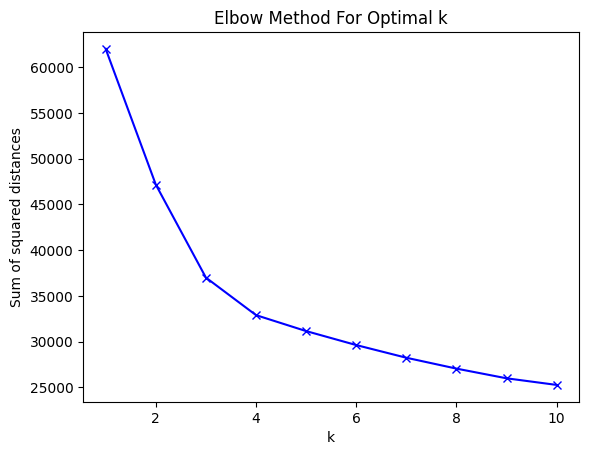

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Determine the number of clusters using the elbow method
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(df_churn)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with the chosen number of clusters (e.g., 3 based on the elbow method)
optimal_clusters = 3  # Adjust this based on your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_churn['Cluster'] = kmeans.fit_predict(df_churn)


In [ ]:
# Add original non-scaled columns back for analysis
df_churn['Monthly Charges'] = original_df['Monthly Charges']
df_churn['Total Charges'] = original_df['Total Charges']
df_churn['Churn Label'] = original_df['Churn Label']

# Analyze clusters
cluster_summary = df_churn.groupby('Cluster').agg({
    'Churn Label': 'mean',
    'Monthly Charges': 'mean',
    'Total Charges': 'mean',
    'Cluster': 'count'  # Count of people in each cluster
}).rename(columns={'Churn Label': 'Churn Rate', 'Cluster': 'Count'})

# Calculate percentage of total population
total_population = df_churn.shape[0]
cluster_summary['Percentage'] = (cluster_summary['Count'] / total_population) * 100

print(cluster_summary)


         Churn Rate  Monthly Charges  Total Charges  Count  Percentage
Cluster                                                               
0          0.109601        87.396241    5153.108696   2208   31.399317
1          0.458927        69.875205    1110.001637   3299   46.914107
2          0.074098        21.096262     666.366754   1525   21.686576


### Cluster Analysis

In [ ]:
# Calculate summary statistics for each cluster
cluster_traits = df_churn.groupby('Cluster').mean()
display(cluster_traits)


,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.076277,87.396241,5153.108696,0.109601,0.109601,-0.263672,0.591659,0.195652,0.256341,0.591486,...,0.000000,0.678895,0.000000,0.569746,0.324275,0.440670,0.676178,0.319293,0.275815,0.080163
1,-0.687639,69.875205,1110.001637,0.458927,0.458927,0.306395,-0.387110,0.199454,0.150045,0.542589,...,0.000000,0.278569,0.000000,0.237042,0.118521,0.023947,0.675356,0.145802,0.495302,0.209457
2,-0.070754,21.096262,666.366754,0.074098,0.074098,-0.281054,-0.019218,0.034098,0.366557,0.000000,...,0.996721,0.000000,0.996721,0.000000,0.239344,0.415082,0.293115,0.219672,0.080000,0.482623


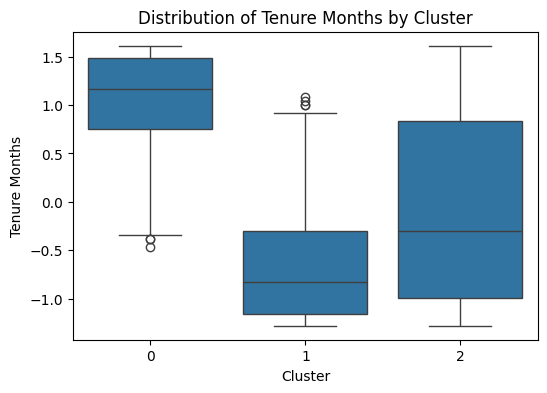

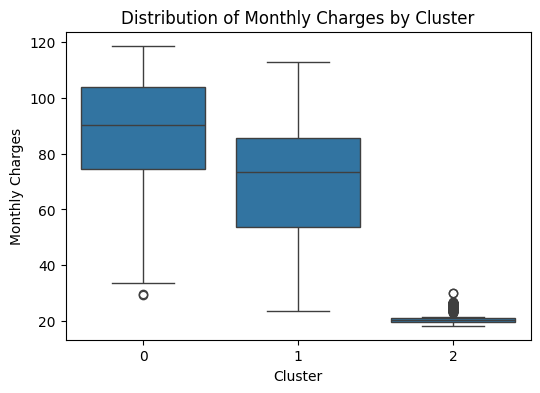

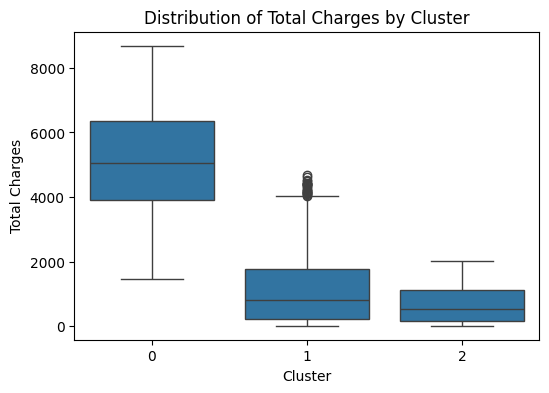

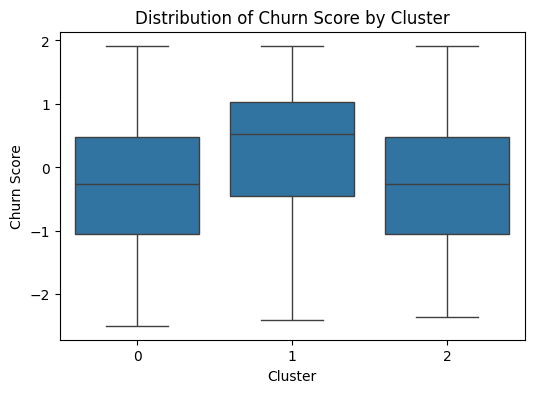

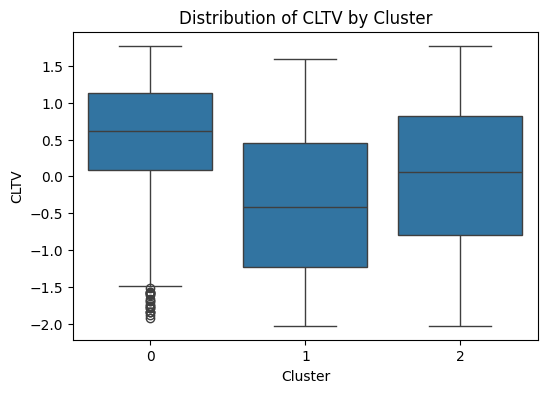

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to visualize
features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Create box plots for each feature by cluster
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df_churn)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [ ]:
# Analyze the distribution of categorical features within each cluster
categorical_features = ['Senior Citizen_Yes', 'Dependents_Yes', 'Internet Service_Fiber optic', 'Internet Service_No',
                        'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No internet service',
                        'Online Backup_Yes', 'Device Protection_No internet service', 'Device Protection_Yes',
                        'Tech Support_No internet service', 'Tech Support_Yes', 'Contract_One year', 'Contract_Two year',
                        'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check',
                        'Payment Method_Mailed check']

for feature in categorical_features:
    cluster_dist = df_churn.groupby('Cluster')[feature].mean()
    print(f'\nDistribution of {feature} by Cluster:\n', cluster_dist)



Distribution of Senior Citizen_Yes by Cluster:
 Cluster
0    0.195652
1    0.199454
2    0.034098
Name: Senior Citizen_Yes, dtype: float64

Distribution of Dependents_Yes by Cluster:
 Cluster
0    0.256341
1    0.150045
2    0.366557
Name: Dependents_Yes, dtype: float64

Distribution of Internet Service_Fiber optic by Cluster:
 Cluster
0    0.591486
1    0.542589
2    0.000000
Name: Internet Service_Fiber optic, dtype: float64

Distribution of Internet Service_No by Cluster:
 Cluster
0    0.000000
1    0.000000
2    0.996721
Name: Internet Service_No, dtype: float64

Distribution of Online Security_No internet service by Cluster:
 Cluster
0    0.000000
1    0.000000
2    0.996721
Name: Online Security_No internet service, dtype: float64

Distribution of Online Security_Yes by Cluster:
 Cluster
0    0.566576
1    0.231585
2    0.000000
Name: Online Security_Yes, dtype: float64

Distribution of Online Backup_No internet service by Cluster:
 Cluster
0    0.000000
1    0.000000
2    0.996

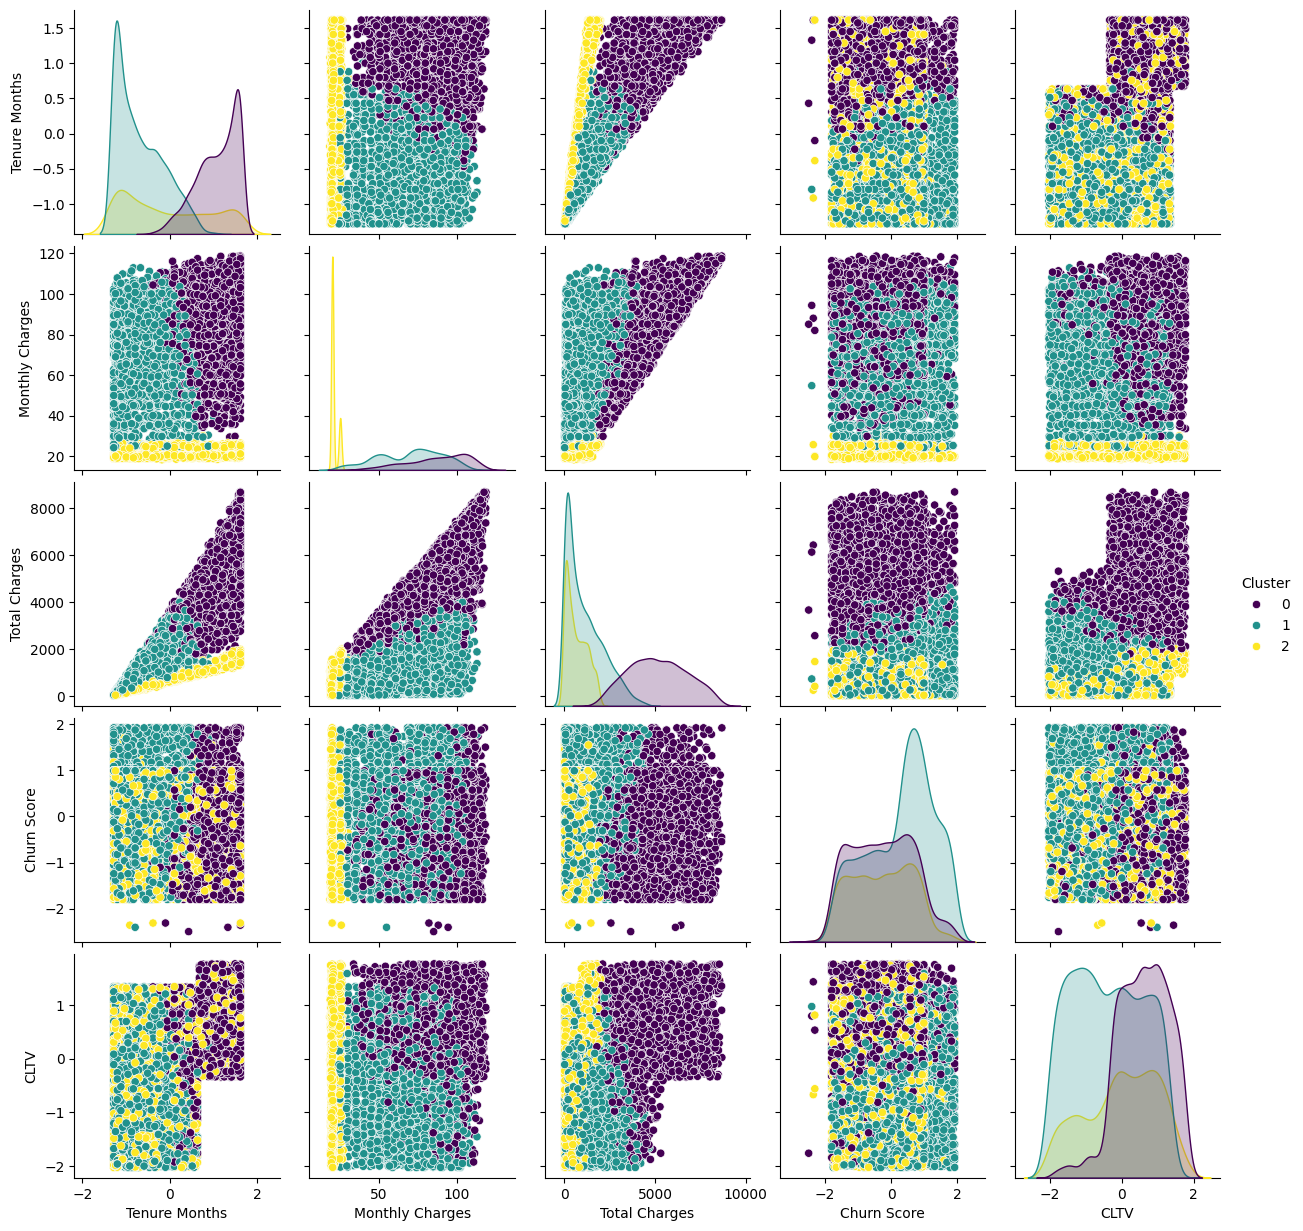

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for visualization
features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Cluster']
df_visualize = df_churn[features]

# Pairplot with hue as cluster
sns.pairplot(df_visualize, hue='Cluster', palette='viridis')
plt.show()


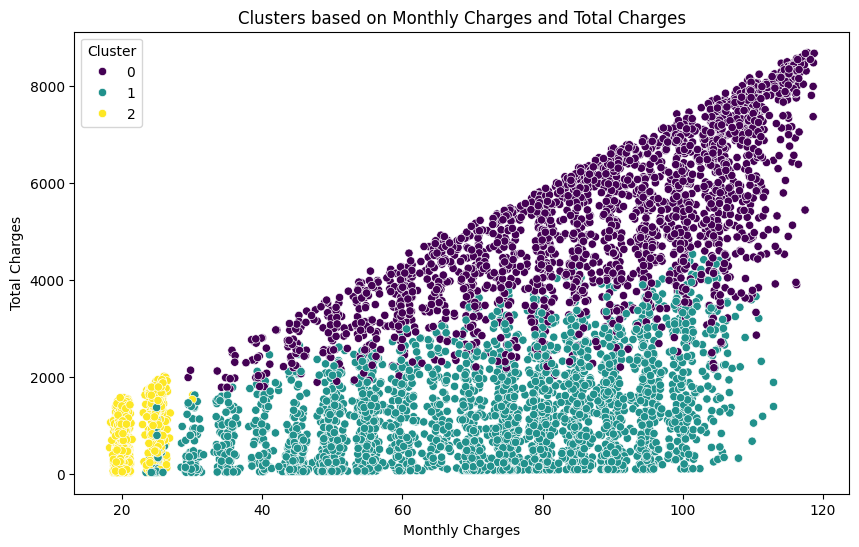

In [ ]:
# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', hue='Cluster', palette='viridis', data=df_churn)
plt.title('Clusters based on Monthly Charges and Total Charges')
plt.show()


# Clustering 2. selected features with categoraize data (combine add-on service to one column)


In [ ]:
df_churn_2 = df.drop(["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude", "Churn Reason", "Gender", "Partner", "Phone Service", "Multiple Lines", "Streaming TV", "Streaming Movies", 'Churn Score', 'Total Charges', 'Churn Label', 'CLTV'], axis = 1)
df_churn_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Dependents         7043 non-null   object 
 2   Tenure Months      7043 non-null   int64  
 3   Internet Service   7043 non-null   object 
 4   Online Security    7043 non-null   object 
 5   Online Backup      7043 non-null   object 
 6   Device Protection  7043 non-null   object 
 7   Tech Support       7043 non-null   object 
 8   Contract           7043 non-null   object 
 9   Paperless Billing  7043 non-null   object 
 10  Payment Method     7043 non-null   object 
 11  Monthly Charges    7043 non-null   float64
 12  Churn Value        7043 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 715.4+ KB


In [ ]:
# Create the 'add_on_service' column based on conditions
df_churn_2['add_on_service'] = df_churn_2.apply(
    lambda row: 1 if (row['Online Security'] == 'Yes' or
                      row['Online Backup'] == 'Yes' or
                      row['Device Protection'] == 'Yes' or
                      row['Tech Support'] == 'Yes') else 0,
    axis=1
)

# Display the first few rows to verify the new column
print(df_churn_2[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'add_on_service']].head())


  Online Security Online Backup Device Protection Tech Support  add_on_service
0             Yes           Yes                No           No               1
1              No            No                No           No               0
2              No            No               Yes           No               1
3              No            No               Yes          Yes               1
4              No           Yes               Yes           No               1


In [ ]:
df_churn_2 = df_churn_2.drop(['Online Security', 'Online Backup', 'Device Protection', 'Tech Support'], axis=1)
df_churn_2.head()

,Senior Citizen,Dependents,Tenure Months,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,add_on_service
0,No,No,2,DSL,Month-to-month,Yes,Mailed check,53.85,1,1
1,No,Yes,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,1,0
2,No,Yes,8,Fiber optic,Month-to-month,Yes,Electronic check,99.65,1,1
3,No,Yes,28,Fiber optic,Month-to-month,Yes,Electronic check,104.80,1,1
4,No,Yes,49,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),103.70,1,1


In [ ]:
df_churn_2 = pd.get_dummies(df_churn_2, columns=['Senior Citizen', 'Dependents', 'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first = True)
df_churn_2.head()

,Tenure Months,Monthly Charges,Churn Value,add_on_service,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,1,1,False,False,False,False,False,False,True,False,False,True
1,2,70.70,1,0,False,True,True,False,False,False,True,False,True,False
2,8,99.65,1,1,False,True,True,False,False,False,True,False,True,False
3,28,104.80,1,1,False,True,True,False,False,False,True,False,True,False
4,49,103.70,1,1,False,True,True,False,False,False,True,False,False,False


In [ ]:
df_churn_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7043 non-null   int64  
 1   Monthly Charges                         7043 non-null   float64
 2   Churn Value                             7043 non-null   int64  
 3   add_on_service                          7043 non-null   int64  
 4   Senior Citizen_Yes                      7043 non-null   bool   
 5   Dependents_Yes                          7043 non-null   bool   
 6   Internet Service_Fiber optic            7043 non-null   bool   
 7   Internet Service_No                     7043 non-null   bool   
 8   Contract_One year                       7043 non-null   bool   
 9   Contract_Two year                       7043 non-null   bool   
 10  Paperless Billing_Yes                   7043 non-null   bool

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

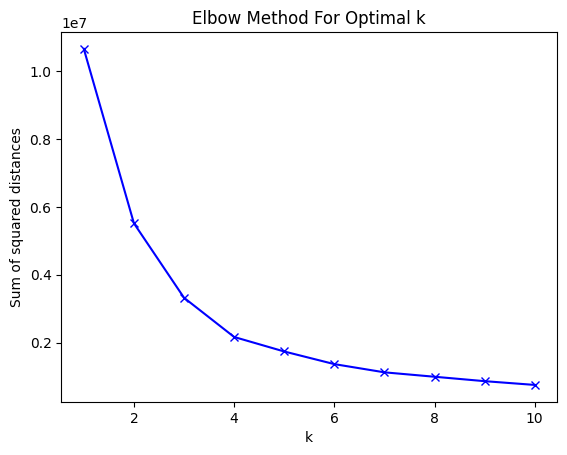

In [ ]:
# Determine the number of clusters using the elbow method
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(df_churn_2)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Fit KMeans with the chosen number of clusters
optimal_clusters = 4  # Adjust this based on your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=22)
df_churn_2['Cluster'] = kmeans.fit_predict(df_churn_2) + 1  # Adding 1 to start clusters from 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Cluster Analysis

In [ ]:
# Cluster Summary of Mean Values for Each Cluster
# Analyze clusters
cluster_summary = df_churn_2.groupby('Cluster').agg({
    'Churn Value': 'mean',
    'Tenure Months': 'mean',
    'Monthly Charges': 'mean',
    'add_on_service':'mean',
    'Internet Service_Fiber optic':'mean',
    'Cluster': 'count'  # Count of people in each cluster
}).rename(columns={'Churn Value': 'Churn Rate', 'Cluster': 'Number of Customers'})

# Calculate percentage of total population
total_population = df_churn.shape[0]
cluster_summary['Percentage of Customers'] = (cluster_summary['Number of Customers'] / total_population) * 100
cluster_summary = cluster_summary.round(2)

display(cluster_summary)


,Churn Rate,Tenure Months,Monthly Charges,add_on_service,Internet Service_Fiber optic,Number of Customers,Percentage of Customers
Cluster,,,,,,,
1,0.49,14.77,81.09,0.64,0.78,2186,31.09
2,0.25,10.59,32.64,0.30,0.00,1745,24.82
3,0.05,54.17,33.96,0.40,0.00,1153,16.40
4,0.16,58.58,93.28,0.96,0.71,1959,27.86


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Calculate summary statistics for each cluster
cluster_traits = df_churn_2.groupby('Cluster').mean()
cluster_traits['Contract_Month_to_Month'] = 1 - (cluster_traits['Contract_One year'] + cluster_traits['Contract_Two year'])
display(cluster_traits)


,Tenure Months,Monthly Charges,Churn Value,add_on_service,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_Month_to_Month
Cluster,,,,,,,,,,,,,,,
1,14.766697,81.085178,0.491308,0.638152,0.229186,0.129003,0.782251,0.000000,0.109332,0.022415,0.724611,0.142726,0.548033,0.150961,0.868253
2,10.594842,32.643123,0.245272,0.300287,0.071060,0.261318,0.000000,0.493983,0.173066,0.100287,0.421203,0.151862,0.232665,0.493983,0.726648
3,54.169124,33.964224,0.047702,0.396357,0.078057,0.366869,0.000000,0.575889,0.282741,0.564614,0.399827,0.294016,0.141370,0.242845,0.152645
4,58.583461,93.283002,0.159265,0.956611,0.217968,0.237876,0.707504,0.000000,0.309342,0.418581,0.710056,0.309342,0.305258,0.071465,0.272078


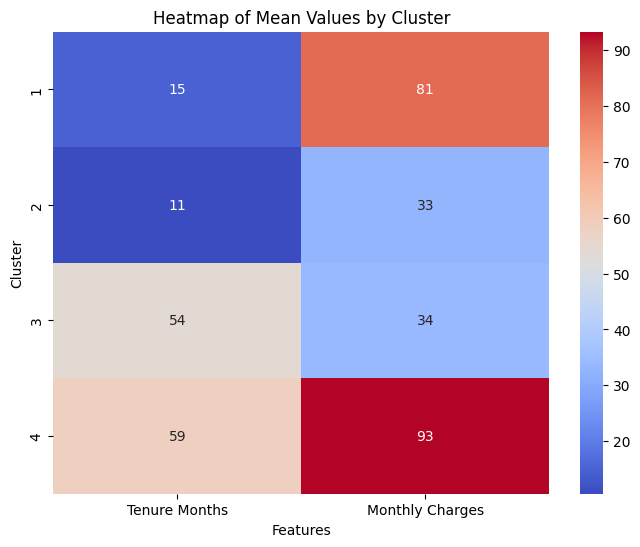

In [ ]:
# List of features to visualize
features = ['Tenure Months', 'Monthly Charges']

# Heatmap of mean values for each feature across clusters
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_traits[features], annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

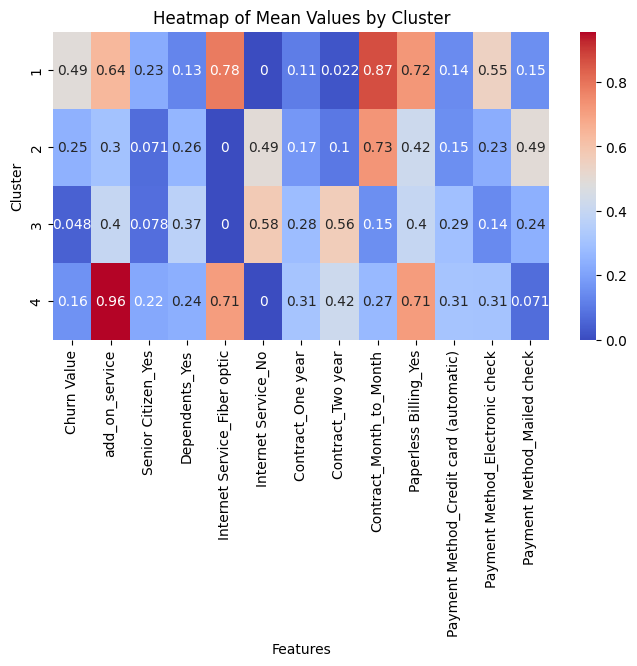

In [ ]:
all_features = [ 'Churn Value', 'add_on_service',
            'Senior Citizen_Yes', 'Dependents_Yes', 'Internet Service_Fiber optic',
            'Internet Service_No', 'Contract_One year', 'Contract_Two year',
            'Contract_Month_to_Month', 'Paperless Billing_Yes',
            'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check',
            'Payment Method_Mailed check']
# Heatmap of mean values for each feature across clusters
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_traits[all_features], annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

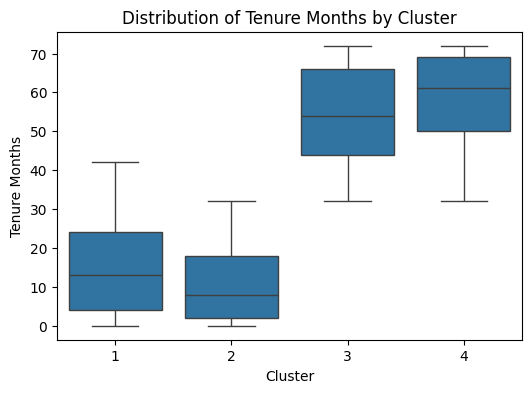

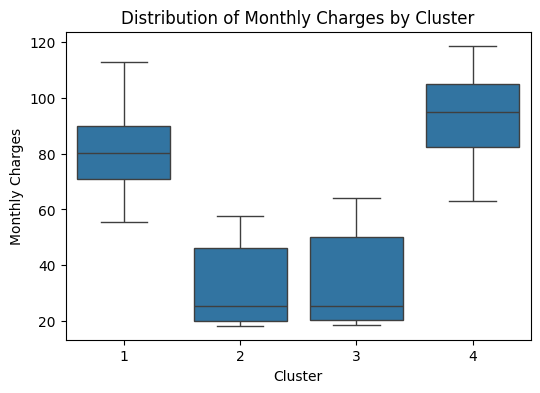

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create box plots for each feature by cluster
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df_churn_2)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


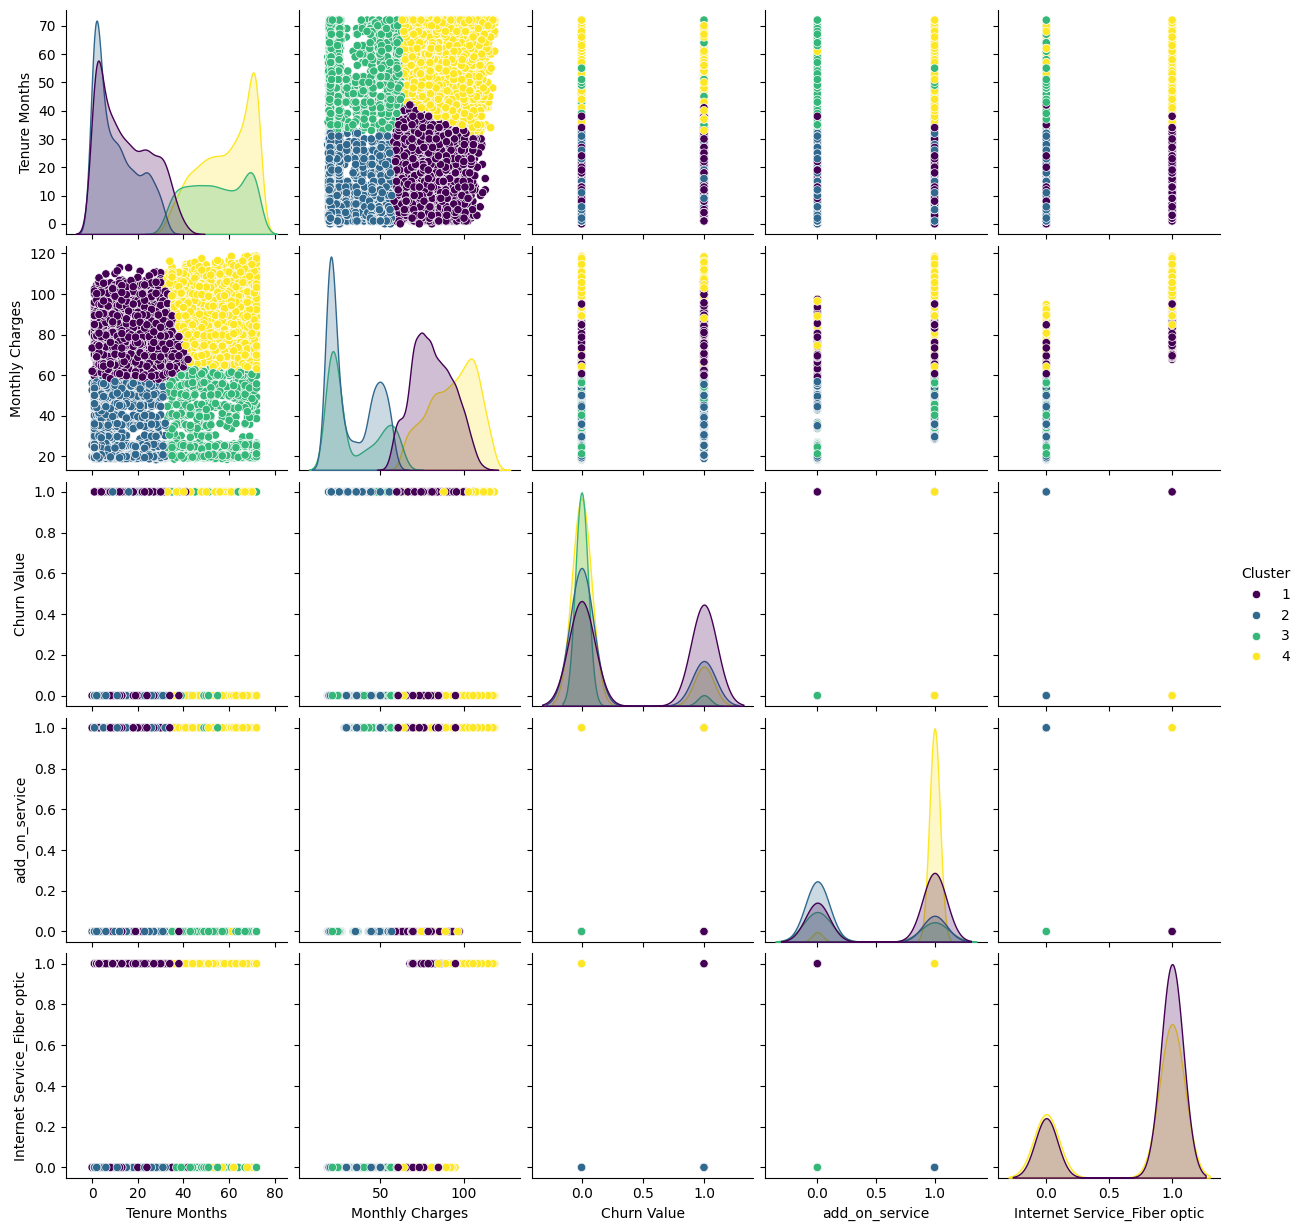

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for visualization
features = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'add_on_service', 'Cluster', 'Internet Service_Fiber optic']
df_visualize = df_churn_2[features]

# Pairplot with hue as cluster
sns.pairplot(df_visualize, hue='Cluster', palette='viridis')
plt.show()


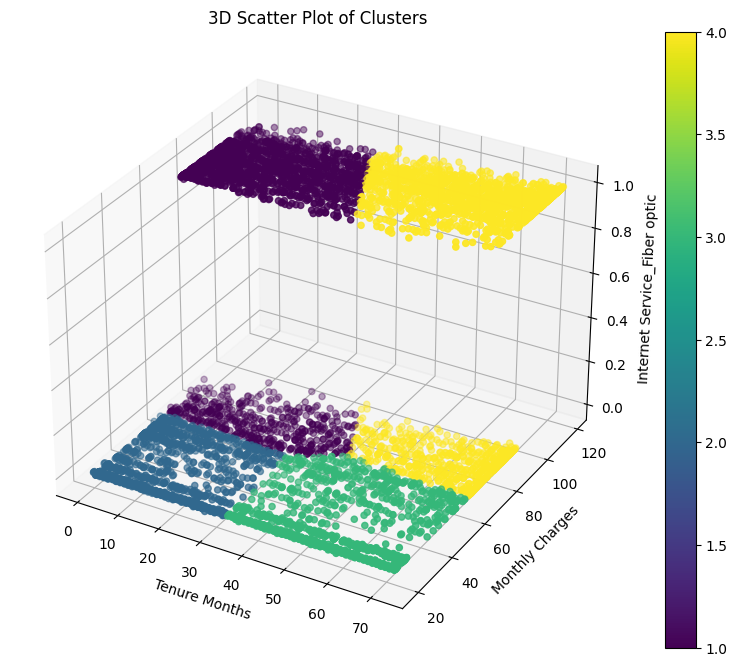

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_churn_2['Tenure Months'], df_churn_2['Monthly Charges'], df_churn_2['Internet Service_Fiber optic'],
                c=df_churn_2['Cluster'], cmap='viridis')

plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')
ax.set_zlabel('Internet Service_Fiber optic')
plt.title('3D Scatter Plot of Clusters')
plt.colorbar(sc)
plt.show()


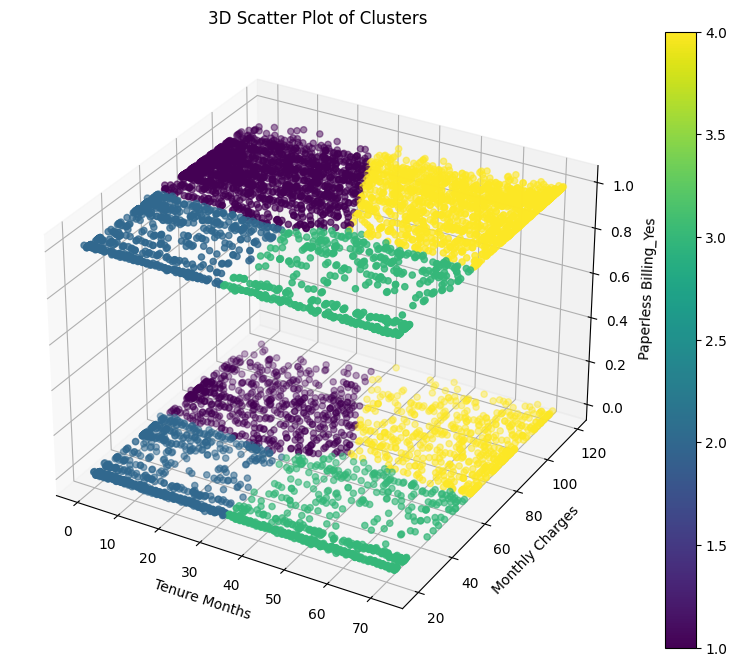

In [ ]:
# 3D scatter plot for three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_churn_2['Tenure Months'], df_churn_2['Monthly Charges'], df_churn_2['Paperless Billing_Yes'],
                c=df_churn_2['Cluster'], cmap='viridis')

plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')
ax.set_zlabel('Paperless Billing_Yes')
plt.title('3D Scatter Plot of Clusters')
plt.colorbar(sc)
plt.show()
